## ML4DS Lab: Week 3: Classification Part 1.

### Aims:
    * Practice K-Nearest Neighbour.
    * Practice Logistic Regression.
    * Compare classifiers with ROC and AUC.


### Task 1: K - Nearest Neighbours

#### Task 1.1: Import and load the data:

In [1]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Height')

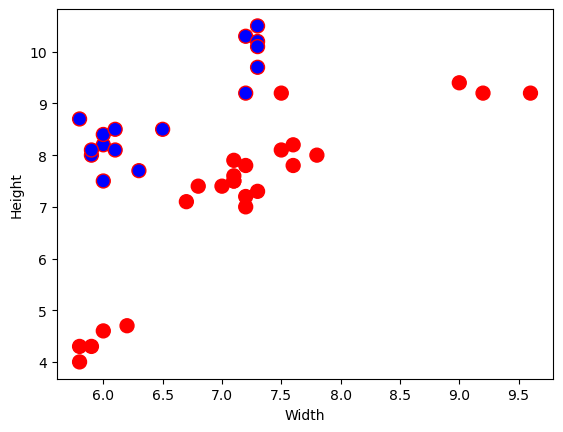

In [2]:
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

dt = np.loadtxt('orange_lemon.txt', delimiter = ',') # Load the orange and lemon data in the txt file.
X = dt[:, 1:3]
t = dt[:, 0]
# Plot data
plt.scatter(X[:,0], X[:,1], c=t, cmap=cmap_bold, edgecolor='r', s=100)
plt.xlabel('Width')
plt.ylabel('Height')

#### Task 1.2: Test K-NN with orange and lemon data.

In [3]:
# This cell creates a 2-d grid of points
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


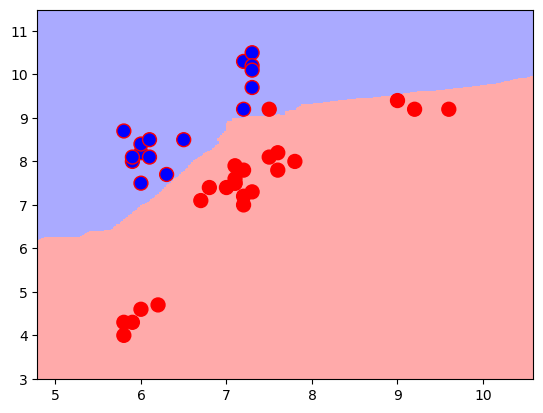

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# Train K-NN using orange and lemon data, test on the created mesh grid:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# Create the K-NN classifier with, for example, k=11 or 40 from class
clf = KNeighborsClassifier(n_neighbors=11)
# Train the classifier
clf.fit(X, t)

# Use the classifier to predict the class for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Reshape the predicted classes to match the mesh shape
Z = Z.reshape(xx.shape)



# Plot the results.
# You need pcolormesh to plot the colored mesh
# Reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html

# Plot the decision boundary
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='r', s=100)
# Show the plot
plt.show()

#### Task 1.3: Use cross-validation to determine the number of neighbours.

0.0


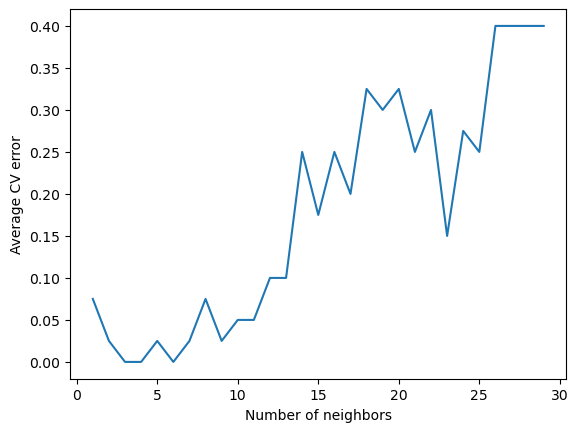

In [5]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Try different range of possible number of neighbors.
cv_scores = []
for i in range (1, 30, 1):
  knn_cv = KNeighborsClassifier (n_neighbors = i)
  cv_scores.append(1 - np.mean(cross_val_score(knn_cv, X, t, cv = 5)))

plt.plot(np.arange(1,30,1),cv_scores)
plt.xlabel ('Number of neighbors')
plt.ylabel ('Average CV error')
print(np.min(cv_scores))

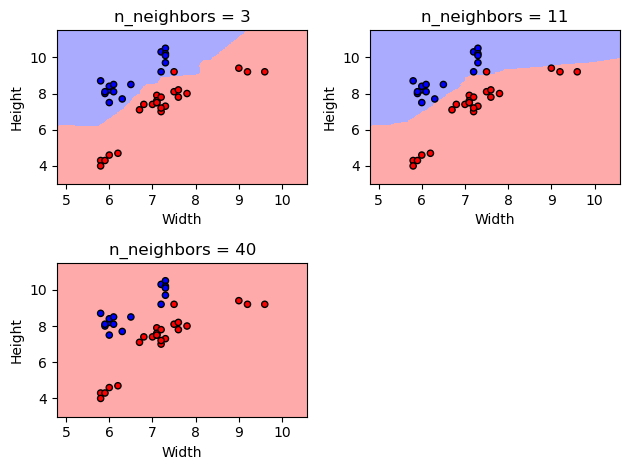

In [6]:
# Try out different number different number of neighbors, check when do you loss one of your classes
# Try different numbers of neighbors
neighbor_values = [3, 11, 40]

#plt.figure(figsize=(12, 9))

for i, n_neighbors in enumerate(neighbor_values, start=1):
    plt.subplot(2, 2, i)

    # Train K-NN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, t)

    # Create a mesh grid for plotting the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Use the classifier to predict the class for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predicted classes to match the mesh shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(f'n_neighbors = {n_neighbors}')

plt.tight_layout()
plt.show()

#### Task 1.4: Try out the 'weight' parameter:
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [7]:
# K-NN has a weight paramenter, see if it can rescue the classification.

### Task 2: Logistic Regression.

#### Task 2.1: Train a Logistic Regression classifier with orange and lemon data

In [8]:
from sklearn.linear_model import LogisticRegression
# Plot the probabilities
# Also check the CV error

#### Task 2.2: Train a  L2 Regularised Logistic Regression.

In [9]:
# define a range of different strength of regularisation

In [10]:
# Use GridSearchCV to find the optimal regularisation strength,
# fit the corresponding L2 regularised logistic regression model,
# plot the classification result,
# and check the CV error
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Task 3: Compare classifiers with ROC and AUC.

#### Task 3.1: ROC and AUC on Logistic Regression

In [11]:
# Here we use a different dataset
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
t = breast_cancer.target

Use the `train_test_split` function to create a training and testing split. The figures are produced with 'random_state=123'

In [12]:
# Plot the ROC curve for a Logistic Regression classifier with your training and test data,
# Also compute the AUC
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

#### Task 3.2: ROC and AUC on K-Nearest Neighbours.

In [13]:
# Plot the ROC curve for a KNN classifier with your training and test data,
# Also compute the AUC
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

#### Task 3.3: Comparison of Logistic Regression and K-NN ROCs.

In [14]:
# Overlay the two ROC curves

In [15]:
#### Task 3.4: Run cross validation using AUC as performance metric for the two classifiers